# Email Segmentation Forecasting and Bank Subscriber Forecasting

Author: Shengqi You

Course Project, UC Irvine, Math 10, F23

## Introduction


Our dataset comes from the UCI's machine learning related website and is a dataset on email text and email categorization. In this project I need to read the text and extract features from the text, which may use some deep learning stuff. At the end we still use machine learning models. I will compare some machine learning models to see how accurate their predictions are.

But after that , I have re-selected a dataset of bank users, in which personal information about the users is recorded and I will analyze and make predictions about whether or not they are loanable users, which will be more relevant to the content of this course than the previous project.

# Bank Subscriber Forecasting

## Adding Necessary Packages

In [ ]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os
import altair as alt
from sklearn.model_selection import train_test_split

## Generate Training and Test Data

In [ ]:
df = pd.read_csv("bank-full.csv")

#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)
df.head(20)


user  age           job   marital  education default  balance housing  \
0      0   58    management   married   tertiary      no     2143     yes   
1      1   44    technician    single  secondary      no       29     yes   
2      2   33  entrepreneur   married  secondary      no        2     yes   
3      3   47   blue-collar   married    unknown      no     1506     yes   
4      4   33       unknown    single    unknown      no        1      no   
5      5   35    management   married   tertiary      no      231     yes   
6      6   28    management    single   tertiary      no      447     yes   
7      7   42  entrepreneur  divorced   tertiary     yes        2     yes   
8      8   58       retired   married    primary      no      121     yes   
9      9   43    technician    single  secondary      no      593     yes   
10    10   41        admin.  divorced  secondary      no      270     yes   
11    11   29        admin.    single  secondary      no      390     yes   
12    12   53    technician   married  secondary      no        6     yes   
13    13   58    technician   married    unknown      no       71     yes   
14    14   57      services   married  secondary      no      162     yes   
15    15   51       retired   married    primary      no      229     yes   
16    16   45        admin.    single    unknown      no       13     yes   
17    17   57   blue-collar   married    primary      no       52     yes   
18    18   60       retired   married    primary      no       60     yes   
19    19   33      services   married  secondary      no        0     yes   

   loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0    no  unknown    5   may       261         1     -1         0  unknown  no  
1    no  unknown    5   may       151         1     -1         0  unknown  no  
2   yes  unknown    5   may        76         1     -1         0  unknown  no  
3    no  unknown    5   may        92         1     -1         0  unknown  no  
4    no  unknown    5   may       198         1     -1         0  unknown  no  
5    no  unknown    5   may       139         1     -1         0  unknown  no  
6   yes  unknown    5   may       217         1     -1         0  unknown  no  
7    no  unknown    5   may       380         1     -1         0  unknown  no  
8    no  unknown    5   may        50         1     -1         0  unknown  no  
9    no  unknown    5   may        55         1     -1         0  unknown  no  
10   no  unknown    5   may       222         1     -1         0  unknown  no  
11   no  unknown    5   may       137         1     -1         0  unknown  no  
12   no  unknown    5   may       517         1     -1         0  unknown  no  
13   no  unknown    5   may        71         1     -1         0  unknown  no  
14   no  unknown    5   may       174         1     -1         0  unknown  no  
15   no  unknown    5   may       353         1     -1         0  unknown  no  
16   no  unknown    5   may        98         1     -1         0  unknown  no  
17   no  unknown    5   may        38         1     -1         0  unknown  no  
18   no  unknown    5   may       219         1     -1         0  unknown  no  
19   no  unknown    5   may        54         1     -1         0  unknown  no

In [ ]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

Users have been tagged good or bad.(Not yet defined in the original data)

In [ ]:
df.groupby('y').mean()

user        age      balance        day    duration  campaign  \
y                                                                            
no   21197.503081  40.838986  1303.714969  15.892290  221.182806  2.846350   
yes  33228.953867  41.670070  1804.267915  15.158253  537.294574  2.141047   

         pdays  previous  
y                         
no   36.421372  0.502154  
yes  68.702968  1.170354

## Feature Engineering

In [ ]:
#Define X and y
X = df.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)

y = df['y']

X = pd.get_dummies(X)
y = pd.get_dummies(y)

X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

Dummy Variable Trap can influence negatively in our analyses. Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms, one variable can be predicted from the others. The best definition for Dummy Variable

## Visualising Data

In [ ]:
hist_subscribed = alt.Chart(df.head(5000)).mark_bar(color='green').encode(
    alt.X('age', bin=alt.Bin(step=10), title='Age'),
    alt.Y('count()', title='Count'),
    alt.Tooltip(['age', 'count()'])
).properties(
    title="Age Distribution "
)

hist_subscribed

# Only 5000 examples can be shown

alt.Chart(...)

In [ ]:
scatter_plot = alt.Chart(df.head(10)).mark_point().encode(
    x=alt.X('age', title='Age'),
    y=alt.Y('duration:Q', title='Duration'),
    
    tooltip=['age', 'duration']
).properties(
    title='Scatter Plot of Age vs Duration ',
    width=600,
    height=400
)

scatter_plot.display()

alt.Chart(...)

Show more relationships between different data

In [ ]:
# Assuming df is your existing DataFrame
variables = ['age', 'balance', 'duration']

# Create a base chart
base = alt.Chart(df.head(5000)).mark_point().encode(
    color='y:N'
)

# Create a repeated chart for pair plot
pairplot = base.encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=200,
    height=200
).repeat(
    row=variables,
    column=variables
).resolve_scale(color='independent')

# Display the chart
pairplot.display()

alt.RepeatChart(...)

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Balancing the Trainng Set

In machine learning tasks, we often encounter this nuisance: the data imbalance problem.

The data imbalance problem exists mainly in supervised machine learning tasks. When encountering unbalanced data, traditional classification algorithms, which have overall classification accuracy as their learning goal, focus too much on the majority class, which results in a degradation of the classification performance of the minority class samples. The vast majority of common machine learning algorithms do not work well with unbalanced datasets.

In [ ]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [ ]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

Determine the Majority and Minority Class:

The if-else block compares the lengths of pos_index and neg_index to determine which class has more instances (i.e., the majority class).
higher is set to the index list of the majority class, and lower is set to the index list of the minority class.
Random Sampling from the Majority Class:

np.random.choice(higher, size=len(lower)) is used to randomly sample instances from the majority class so that its size matches the minority class. This is done to balance the classes.
random.seed(0) ensures that the random sampling is reproducible; it will produce the same results each time the code is run.
Create a Balanced Dataset:

lower is converted to a NumPy array to ensure compatibility for concatenation.
new_indexes is created by concatenating the down-sampled majority class indexes (higher) with the minority class indexes (lower). This creates a new index array that represents a balanced dataset.

In [ ]:
y_train['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

## Feature Scaling

StandardScaler is a class from the scikit-learn library used to standardize features by removing the mean and scaling to unit variance. Standardizing features is an important step, especially for algorithms that are sensitive to the scale of input features, like SVMs, k-nearest neighbors, and principal component analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## LogisticRegression

We're very familiar with this piece.

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classifier.coef_

array([[-0.09572692, -0.21519623, -1.62131306,  0.32479807, -0.19420282,
        -0.34889164,  0.09061903]])

ages and balance may be much more important.

In [ ]:
classifier.classes_

array([0, 1], dtype=uint8)

In [ ]:
classifier.intercept_

array([-0.18344598])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

## result

In [ ]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.797412   0.951431  0.812023  0.876216
1  K-Nearest Neighbors   0.779056   0.963893  0.778961  0.861615
2         Decision Tree  0.716908   0.950956  0.716343  0.817143

As you can see from the graph, Logistic Regression and KNN will perform better in terms of performance. But the fact that all three models did not perform as well as I expected is unfortunate.

I finally wanted to visualize the decision boundaries of our different machine learning models. After processing the training data multiple times, it was really hard for me to merge it into the initial table and use the Altair package, so I processed the data again here and then used the matplotlib package

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Selecting two features for the visualization
# For demonstration, let's select 'age' and 'balance' as two features. 

selected_features = ['age', 'balance']

# Preprocessing
df['y'] = df['y'].map({'yes': 1, 'no': 0})
X = df[selected_features]
y = df['y']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training models
log_reg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fitting the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

We have mapped the decision boundary here for specific reference:https://blog.csdn.net/weixin_45891612/article/details/128858765?ops_request_misc=&request_id=&biz_id=102&utm_term=decision_boundary%E4%BD%9C%E5%9B%BE%E6%96%B9%E6%B3%95&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-128858765.142^v96^control&spm=1018.2226.3001.4187

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


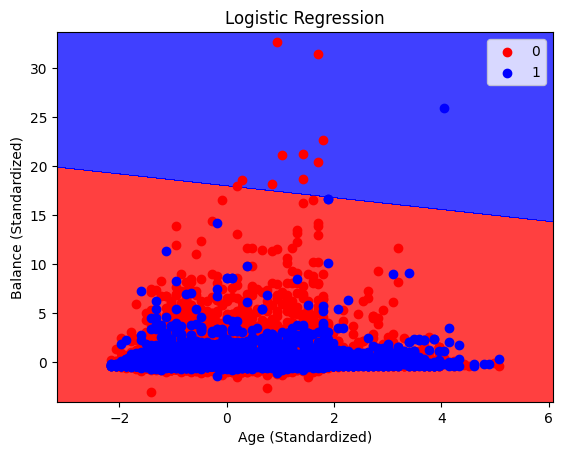

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'blue'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Balance (Standardized)')
    plt.legend()
    plt.show()

# Plotting decision boundaries for each model
plot_decision_boundary(X_train, y_train, log_reg, 'Logistic Regression')

* The KNN boundary can not be display , I thought it's very weird.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


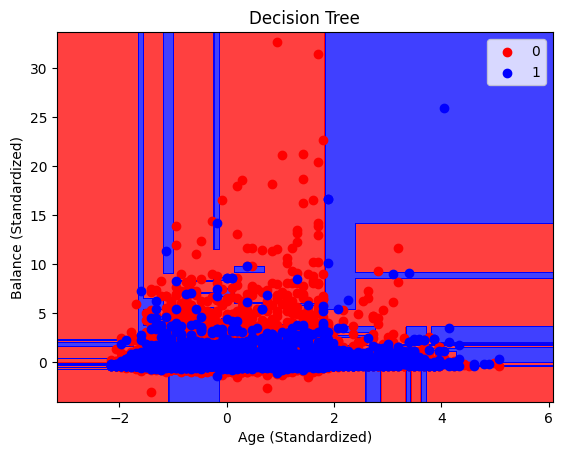

In [ ]:
plot_decision_boundary(X_train, y_train, dtree, 'Decision Tree')

As we can see, the decision boundaries for the each graph are very different, only Logistic Regression has clear decision boundaries while the DecisionTreeClassifier  has very mixed boundaries.  While this doesn’t completely show how each model makes predictions, it does offer some very interesting insight into how each of these models work and the differences between them.

# Mail Classification

# Regression

## Adding Necessary Packages

In [ ]:
!pip install wordcloud==1.9.3


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install wget
import tensorflow as tf
import os, sys, shutil, tempfile, wget
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import altair as alt



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
2023-12-14 08:02:23.659091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 08:02:23.865421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-14 08:02:23.865455: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-14 08:02:23.918215: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory fo

## Generate Training and Test Data

In [ ]:
# Load the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', names=["Label", "SMS"])

print(df.shape)
df1 = df.head(5000)


# Convert labels to binary values , Feature engineering
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['SMS'], df['Label'], test_size=0.2, random_state=42)

import altair as alt

# Visualize the distribution of labels in the dataset using Altair
label_distribution_chart = alt.Chart(df1).mark_bar().encode(
    alt.X('Label:N'),
    alt.Y('count():Q'),
    color='Label:N',
    tooltip=['Label:N', 'count()']
).properties(
    title='Distribution of Labels in the Dataset'
)

label_distribution_chart


(5572, 2)


alt.Chart(...)

The data has only two columns, so we have to figure out how to extract features from the text data.

In [ ]:
label_distribution_chart1 = alt.Chart(df1).mark_point().encode(
    alt.X('Label:N'),
    alt.Y('count():Q'),
    color='Label:N',
    tooltip=['Label:N', 'count()']
).properties(
    title='Distribution of Labels in the Dataset'
)
label_distribution_chart1

alt.Chart(...)

## Vectorize the SMS data

Here we introduce the feature extraction tool，we use TF-idf an optimized word frequency statistical vectorization method, is a way to turn text into numerical data, direct use on the line.
Take out X and y, X word vectorization processing.

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

X_train_vect.shape

(4457, 7567)

As you can see, X, which was originally a column of text, has now become a feature variable, and they are all numeric, which can be used directly for modeling calculations.

## Initialize Logistic Regression Model

Since the predictions are for string type data, we should start with a LogisticRegression as our model for our machine.

In [ ]:
model = LogisticRegression()

## Train the Model

In [ ]:
model.fit(X_train_vect, y_train)

LogisticRegression()

## Validate the Model

In [ ]:
# Predict on test data
y_pred = model.predict(X_test_vect)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('')

print(f'Accuracy: {accuracy}')

import altair as alt

# Sample a subset of the data to avoid MaxRowsError
df_sample = df.sample(1115, random_state=42)

# Dot plot: Length of SMS messages for ham and spam
df_sample['SMS_length'] = df_sample['SMS'].apply(len)
df_sample["pred"] = y_pred

dot_plot = alt.Chart(df_sample).mark_point(size=60).encode(
    x=alt.X('pred', title='Message Type'),
    y=alt.Y('SMS_length:Q', title='SMS Length'),
    color=alt.Color('pred:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), legend=None),
    tooltip=['pred:N', 'count()']
).properties(
    title='Dot Plot of SMS Length for Ham and Spam Messages',
    width=300
)
dot_plot



Accuracy: 0.9721973094170404


alt.Chart(...)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.intercept_


array([-2.47425518])

In [ ]:
model.coef_

array([[ 0.65752426,  1.29532624, -0.01725343, ..., -0.01139043,
        -0.01464767,  0.13616753]])

## Word cloud: Most frequent words in SMS messages

The wordcloud library is an excellent third-party library for displaying word clouds, which can turn a piece of text into a word cloud (a word cloud uses words as the basic unit for a more visual and artistic presentation of the text).I think it's very interesting.

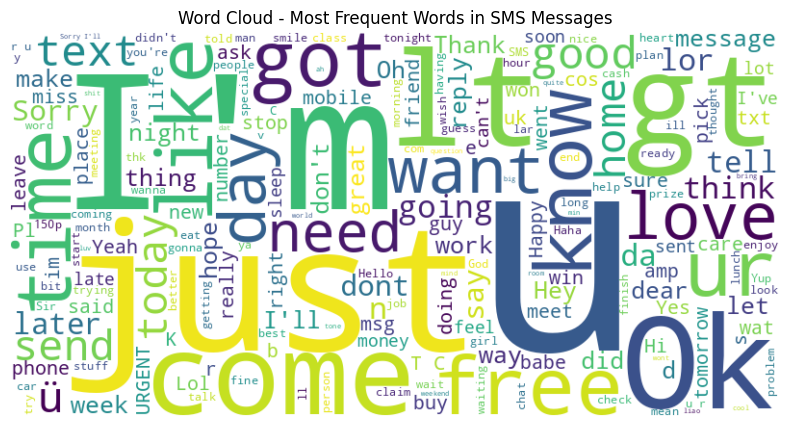

In [ ]:
text = ' '.join(df['SMS'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in SMS Messages')

# Display charts
plt.show()

# Decison Tree Classifier

Next I’ll use a DecisionTreeClassifier since this machine learning model is best model to analyze this type of data that we have used in class.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(max_leaf_nodes= 25)

In [ ]:
clf1.fit(X_train_vect, y_train)


DecisionTreeClassifier(max_leaf_nodes=25)

In [ ]:
y_pred2 = clf1.predict(X_test_vect)

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
print('')
print('')

print(f'Accuracy: {accuracy2}')



Accuracy: 0.9542600896860987


Swap the positions of the training set with the test set to see if there is any overfitting.

In [ ]:
clf2 = DecisionTreeClassifier(max_leaf_nodes= 25)
clf2.fit(X_test_vect, y_test)
y_pred3 = clf2.predict(X_train_vect)
accuracy3 = accuracy_score(y_train, y_pred3)
print('')
print('')

print(f'Accuracy: {accuracy3}')



Accuracy: 0.951312542068656


The model behaves roughly the same after the swap and there should be no overfitting.

# Multi-level Classification

## Again，adding Necessary Packages

In [ ]:
import os, sys, wget
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Generate Training and Test Data

In [ ]:
# Load the data into a DataFrame
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Encode the labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Features and labels
X = df['message']
y = df['label']


## Feature Engineering

Tokenizer is one of the core components of NLP pipeline. The goal is to convert text into data that the model can process. That is, convert text input to digital input

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)


## Build a model

Define the neural network architecture:
The following lines are defining a Sequential model. Sequential is a Keras model that represents a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor, or by using the .add() method to add layers one by one.

In [ ]:
# Pad sequences
X_pad = pad_sequences(X_seq, maxlen=50)

# Define the neural network architecture
model = Sequential() #This line initializes the Sequential model.

#This line adds the first layer to the model, which is a Dense (fully connected) layer with 512 neurons.
model.add(Dense(512, input_shape=(50,), activation='relu'))

#This line adds a second Dense layer with 256 neurons, also with ReLU activation.
model.add(Dense(256, activation='relu'))

#This line adds a third Dense layer with a single neuron and uses the sigmoid activation function. 
model.add(Dense(1, activation='sigmoid'))


2023-12-14 08:02:34.290748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-14 08:02:34.290782: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-14 08:02:34.290799: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-2ad65188-06c4-4ed7-a144-8a7c420abd2f): /proc/driver/nvidia/version does not exist
2023-12-14 08:02:34.291052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile the model

This line of code is configuring the model for training by defining the loss function, the optimizer, and the evaluation metrics.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Data allocation

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=0)

## Train the model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
70/70 [==============================] - 1s 9ms/step - loss: 40.7405 - accuracy: 0.8088 - val_loss: 20.3003 - val_accuracy: 0.6933
Epoch 2/10
70/70 [==============================] - 1s 7ms/step - loss: 8.4930 - accuracy: 0.8616 - val_loss: 11.1212 - val_accuracy: 0.8323
Epoch 3/10
70/70 [==============================] - 0s 7ms/step - loss: 4.1421 - accuracy: 0.9008 - val_loss: 11.6610 - val_accuracy: 0.7865
Epoch 4/10
70/70 [==============================] - 1s 7ms/step - loss: 3.5643 - accuracy: 0.9020 - val_loss: 9.9862 - val_accuracy: 0.7722
Epoch 5/10
70/70 [==============================] - 0s 6ms/step - loss: 2.8527 - accuracy: 0.9042 - val_loss: 9.9826 - val_accuracy: 0.8655
Epoch 6/10
70/70 [==============================] - 1s 7ms/step - loss: 2.0686 - accuracy: 0.9233 - val_loss: 8.5287 - val_accuracy: 0.8816
Epoch 7/10
70/70 [==============================] - 0s 7ms/step - loss: 1.4942 - accuracy: 0.9363 - val_loss: 6.8574 - val_accuracy: 0.8637
Epoch 8/10
70/70

## # Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

35/35 [==============================] - 0s 7ms/step - loss: 7.5730 - accuracy: 0.8933
Loss: 7.573015213012695, Accuracy: 0.8932735323905945


It looks like the regression model performs better on email classification. Because there are only two columns of data in this dataset, and all the features were extracted using a deep learning model, it is difficult to discuss the impact of each feature in the project for this class. For each model I've raised a few small issues of note that have actually been quite rewarding.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

In this project, I used two very different datasets for the analysis, but the results of the exploration tended to be that the simpler model performed better.

I skillfully utilized packages such as scikit-learn,pandas, and Altair to perform operations such as assigning data, cleaning data, performing ad hoc feature engineering, and plotting graphs.

Similarly, I have used interesting tools like StandardScaler, matplotlib, tensorflow.keras, wordcloud, Tokenizer etc. for data analysis which have benefited me a lot.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

1.https://www.kaggle.com/datasets/sonujha090/bank-marketing/data

2.https://archive.ics.uci.edu/dataset/228/sms+spam+collection

* List any other references that you found helpful.

In [ ]:
https://www.kaggle.com/datasets/sonujha090/bank-marketing/code

request_id=&biz_id=102&utm_term=decision_boundary作图方法&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-128858765.142^v96^control&spm=1018.2226.3001.4187

https://so.csdn.net/so/search?spm=1000.2115.3001.4498&q=Tokenizer&t=&u=


